# Model Building and Analysis

### Load the datasets

In [1]:
import pandas as pd

# Load features data
features_df = pd.read_csv('data/features.csv')

# Load stores data
stores_df = pd.read_csv('data/stores.csv')

# Load train data
train_df = pd.read_csv('data/train.csv')

# Load test data
test_df = pd.read_csv('data/test.csv')

merged_df = pd.read_csv('data/merged.csv')

### Feature Engineering

In [2]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Store              421570 non-null  int64  
 1   Dept               421570 non-null  int64  
 2   Date               421570 non-null  object 
 3   Weekly_Sales       421570 non-null  float64
 4   IsHoliday          421570 non-null  int64  
 5   Temperature        421570 non-null  float64
 6   Fuel_Price         421570 non-null  float64
 7   MarkDown1          421570 non-null  float64
 8   MarkDown2          421570 non-null  float64
 9   MarkDown3          421570 non-null  float64
 10  MarkDown4          421570 non-null  float64
 11  MarkDown5          421570 non-null  float64
 12  CPI                421570 non-null  float64
 13  Unemployment       421570 non-null  float64
 14  Type               421570 non-null  object 
 15  Size               421570 non-null  int64  
 16  We

In [4]:
len(merged_df)

421570

In [5]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Week,Month,Year,Weekly_Sales_lag1,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w,Size_Category
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,5,2,2010,21727.986241,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569,Large
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,...,6,2,2010,24924.500000,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569,Large
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,...,7,2,2010,46039.490000,24924.500000,21745.575857,24834.479474,21745.575857,26796.319569,Large
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,...,8,2,2010,41595.550000,46039.490000,21745.575857,24834.479474,21745.575857,26796.319569,Large
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,...,9,3,2010,19403.540000,41595.550000,32990.770000,46039.490000,32990.770000,26796.319569,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,...,39,9,2012,467.300000,605.960000,442.935000,605.960000,442.935000,727.490000,Medium
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,...,40,10,2012,508.370000,467.300000,483.517500,605.960000,483.517500,727.490000,Medium
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,...,41,10,2012,628.100000,508.370000,552.432500,628.100000,552.432500,628.100000,Medium
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,...,42,10,2012,1061.020000,628.100000,666.197500,1061.020000,666.197500,1061.020000,Medium


In [7]:
train_merged_df = merged_df

In [8]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [9]:
merged_df = pd.merge(test_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [10]:
test_merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')
test_merged_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [11]:
train_merged_df.drop(columns = ["Size_Category"], inplace = True)

In [12]:
train_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Store              421570 non-null  int64  
 1   Dept               421570 non-null  int64  
 2   Date               421570 non-null  object 
 3   Weekly_Sales       421570 non-null  float64
 4   IsHoliday          421570 non-null  int64  
 5   Temperature        421570 non-null  float64
 6   Fuel_Price         421570 non-null  float64
 7   MarkDown1          421570 non-null  float64
 8   MarkDown2          421570 non-null  float64
 9   MarkDown3          421570 non-null  float64
 10  MarkDown4          421570 non-null  float64
 11  MarkDown5          421570 non-null  float64
 12  CPI                421570 non-null  float64
 13  Unemployment       421570 non-null  float64
 14  Type               421570 non-null  object 
 15  Size               421570 non-null  int64  
 16  We

In [13]:
test_merged_df['Week'] = test_merged_df['Date'].dt.isocalendar().week
test_merged_df['Month'] = test_merged_df['Date'].dt.month
test_merged_df['Year'] = test_merged_df['Date'].dt.year

In [14]:
test_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     114915 non-null  float64       
 7   MarkDown2     86437 non-null   float64       
 8   MarkDown3     105235 non-null  float64       
 9   MarkDown4     102176 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           76902 non-null   float64       
 12  Unemployment  76902 non-null   float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
 15  Week          115

In [15]:
train_df = train_merged_df

### Time Series Model Fit

In [16]:
train_df = train_df.sort_values(by='Date').reset_index(drop=True)
split_point = int(len(train_df) * 0.85)
train_ts = train_df.iloc[:split_point]
val_ts = train_df.iloc[split_point:]

print(f"Training set size: {len(train_ts)} records")
print(f"Validation set size: {len(val_ts)} records")
print(f"Training period: {train_ts['Date'].min()} to {train_ts['Date'].max()}")
print(f"Validation period: {val_ts['Date'].min()} to {val_ts['Date'].max()}")

Training set size: 358334 records
Validation set size: 63236 records
Training period: 2010-02-05 to 2012-06-01
Validation period: 2012-06-01 to 2012-10-26


In [17]:
train_series = train_ts.groupby('Date')['Weekly_Sales'].sum()
val_series = val_ts.groupby('Date')['Weekly_Sales'].sum()

In [18]:
train_series

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-05-04    47124197.93
2012-05-11    46925878.99
2012-05-18    46823939.22
2012-05-25    47892463.31
2012-06-01    32160923.89
Name: Weekly_Sales, Length: 122, dtype: float64

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt
import numpy as np

In [25]:
print("Fitting Exponential Smoothing Model...")
# Fit the model on the training time series data
# Suppress convergence warnings if they are purely about optimization limits
# For real applications, you'd examine these warnings.
with np.errstate(over='ignore', under='ignore'): # Suppress potential runtime warnings for exp smoothing
    ets_model = ExponentialSmoothing(
        train_series,
        seasonal_periods=52, # 52 weeks in a year for weekly data
        trend='add',        # 'add' or 'mul' for trend component
        seasonal='add',     # 'add' or 'mul' for seasonal component
        initialization_method="estimated" # Let statsmodels estimate initial values
    ).fit()

print("Model fitting complete.")
print(ets_model.summary())

Fitting Exponential Smoothing Model...
Model fitting complete.
                        ExponentialSmoothing Model Results                       
Dep. Variable:             Weekly_Sales   No. Observations:                   122
Model:             ExponentialSmoothing   SSE                 589560460081598.625
Optimized:                         True   AIC                            3675.178
Trend:                         Additive   BIC                            3832.203
Seasonal:                      Additive   AICC                           3783.813
Seasonal Periods:                    52   Date:                  Fri, 27 Jun 2025
Box-Cox:                          False   Time:                          18:43:28
Box-Cox Coeff.:                    None                                          
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.075

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [26]:
n_forecast_steps = len(val_series)
ets_predictions = ets_model.forecast(n_forecast_steps)

# Align predictions with the validation series index for easy comparison
ets_predictions.index = val_series.index

print("\nFirst 5 Exponential Smoothing Predictions on Validation Set:")
print(ets_predictions.head())
print("\nFirst 5 Actual Weekly Sales on Validation Set:")
print(val_series.head())


First 5 Exponential Smoothing Predictions on Validation Set:
Date
2012-06-01    4.725299e+07
2012-06-08    4.702990e+07
2012-06-15    4.553140e+07
2012-06-22    4.723152e+07
2012-06-29    4.734208e+07
dtype: float64

First 5 Actual Weekly Sales on Validation Set:
Date
2012-06-01    16120725.83
2012-06-08    49651171.78
2012-06-15    48412110.70
2012-06-22    47668284.97
2012-06-29    46597112.12
Name: Weekly_Sales, dtype: float64


In [27]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(val_series, ets_predictions))
print(f"\nRMSE on Validation Set: {rmse:.2f}")


RMSE on Validation Set: 7248628.40


In [28]:
ets_in_sample_predictions = ets_model.fittedvalues

# Calculate residuals for the training data
train_residuals = train_series - ets_in_sample_predictions

print("First 5 Training Residuals (for ML model input):")
train_residuals.head()

First 5 Training Residuals (for ML model input):


Date
2010-02-05    3.024378e+06
2010-02-12    2.136533e+05
2010-02-19   -1.226330e+06
2010-02-26   -8.191812e+05
2010-03-05   -6.926762e+05
dtype: float64

In [29]:
overall_ets_predictions = pd.concat([ets_in_sample_predictions, ets_predictions])
overall_ets_predictions.sort_index(inplace=True)
overall_ets_predictions.index = pd.to_datetime(overall_ets_predictions.index)

In [30]:
unique_train_dates = pd.Series(train_df['Date'].unique()).sort_values()
ets_full_train_in_sample_preds_agg = pd.Series(
    np.random.rand(len(unique_train_dates)) * 5000000 + 1000000, # Large numbers for aggregate sales
    index=unique_train_dates
)

In [31]:
train_df['Store_Dept_Pair'] = train_df['Store'].astype(str) + '_' + train_df['Dept'].astype(str)
num_pairs_per_date = train_df.groupby('Date')['Store_Dept_Pair'].nunique()
num_pairs_per_date.index = pd.to_datetime(num_pairs_per_date.index)

In [32]:
num_pairs_per_date

Date
2010-02-05    2955
2010-02-12    2956
2010-02-19    2977
2010-02-26    2951
2010-03-05    2944
              ... 
2012-09-28    2962
2012-10-05    2976
2012-10-12    2990
2012-10-19    2950
2012-10-26    2959
Name: Store_Dept_Pair, Length: 143, dtype: int64

In [33]:
ets_data = pd.concat([overall_ets_predictions, num_pairs_per_date], axis=1)
ets_data.reset_index(inplace=True)

In [34]:
ets_data

,Date,0,Store_Dept_Pair
0,2010-02-05,4.672636e+07,2955
1,2010-02-12,4.812302e+07,2956
2,2010-02-19,4.950332e+07,2977
3,2010-02-26,4.478775e+07,2951
4,2010-03-05,4.756415e+07,2944
...,...,...,...
139,2012-09-28,4.466971e+07,2962
140,2012-10-05,4.264358e+07,2976
141,2012-10-12,4.261323e+07,2990
142,2012-10-19,4.305471e+07,2950


In [35]:
ets_data["ETS Prediction"] = ets_data[0]/ets_data["Store_Dept_Pair"]
ets_data.drop(columns = [0, "Store_Dept_Pair"], inplace=True)

In [36]:
train_df["Date"] = pd.to_datetime(train_df["Date"])

In [37]:
train_merged_df = pd.merge(train_df, ets_data, on='Date', how='left')

In [38]:
train_merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Month,Year,Weekly_Sales_lag1,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w,Store_Dept_Pair,ETS Prediction
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,2,2010,21727.986241,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569,1_1,15812.643904
1,29,5,2010-02-05,15552.08,0,24.36,2.788,0.00,0.00,0.00,...,2,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_5,15812.643904
2,29,6,2010-02-05,3200.22,0,24.36,2.788,0.00,0.00,0.00,...,2,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_6,15812.643904
3,29,7,2010-02-05,10820.05,0,24.36,2.788,0.00,0.00,0.00,...,2,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_7,15812.643904
4,29,8,2010-02-05,20055.64,0,24.36,2.788,0.00,0.00,0.00,...,2,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_8,15812.643904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424508,40,87,2012-10-26,24638.96,0,49.65,3.917,3605.71,55.98,0.28,...,10,2012,21846.830000,26597.310000,26027.252500,31585.040000,26027.252500,31585.040000,40_87,15297.547713
424509,19,30,2012-10-26,3740.12,0,56.49,4.071,5430.75,90.07,0.00,...,10,2012,3534.420000,3162.460000,3232.145000,3534.420000,3232.145000,6089.670000,19_30,15297.547713
424510,19,31,2012-10-26,3128.17,0,56.49,4.071,5430.75,90.07,0.00,...,10,2012,2525.660000,3220.850000,2732.042500,3220.850000,2732.042500,7628.970000,19_31,15297.547713
424511,19,33,2012-10-26,5740.14,0,56.49,4.071,5430.75,90.07,0.00,...,10,2012,6039.320000,5921.390000,5867.835000,6129.310000,5867.835000,10263.720000,19_33,15297.547713


In [39]:
train_merged_df["ML_Residuals"] = train_merged_df["Weekly_Sales"] - train_merged_df["ETS Prediction"]

In [40]:
train_merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Year,Weekly_Sales_lag1,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w,Store_Dept_Pair,ETS Prediction,ML_Residuals
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,2010,21727.986241,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569,1_1,15812.643904,9111.856096
1,29,5,2010-02-05,15552.08,0,24.36,2.788,0.00,0.00,0.00,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_5,15812.643904,-260.563904
2,29,6,2010-02-05,3200.22,0,24.36,2.788,0.00,0.00,0.00,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_6,15812.643904,-12612.423904
3,29,7,2010-02-05,10820.05,0,24.36,2.788,0.00,0.00,0.00,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_7,15812.643904,-4992.593904
4,29,8,2010-02-05,20055.64,0,24.36,2.788,0.00,0.00,0.00,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_8,15812.643904,4242.996096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424508,40,87,2012-10-26,24638.96,0,49.65,3.917,3605.71,55.98,0.28,...,2012,21846.830000,26597.310000,26027.252500,31585.040000,26027.252500,31585.040000,40_87,15297.547713,9341.412287
424509,19,30,2012-10-26,3740.12,0,56.49,4.071,5430.75,90.07,0.00,...,2012,3534.420000,3162.460000,3232.145000,3534.420000,3232.145000,6089.670000,19_30,15297.547713,-11557.427713
424510,19,31,2012-10-26,3128.17,0,56.49,4.071,5430.75,90.07,0.00,...,2012,2525.660000,3220.850000,2732.042500,3220.850000,2732.042500,7628.970000,19_31,15297.547713,-12169.377713
424511,19,33,2012-10-26,5740.14,0,56.49,4.071,5430.75,90.07,0.00,...,2012,6039.320000,5921.390000,5867.835000,6129.310000,5867.835000,10263.720000,19_33,15297.547713,-9557.407713


In [41]:
new_train_df = train_merged_df.drop(columns = ['Weekly_Sales'])
new_train_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Year,Weekly_Sales_lag1,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w,Store_Dept_Pair,ETS Prediction,ML_Residuals
0,1,1,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,...,2010,21727.986241,21744.244475,21745.575857,24834.479474,21745.575857,26796.319569,1_1,15812.643904,9111.856096
1,29,5,2010-02-05,0,24.36,2.788,0.0,0.0,0.0,0.0,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_5,15812.643904,-260.563904
2,29,6,2010-02-05,0,24.36,2.788,0.0,0.0,0.0,0.0,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_6,15812.643904,-12612.423904
3,29,7,2010-02-05,0,24.36,2.788,0.0,0.0,0.0,0.0,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_7,15812.643904,-4992.593904
4,29,8,2010-02-05,0,24.36,2.788,0.0,0.0,0.0,0.0,...,2010,8168.689550,8179.824598,8196.832365,9832.385152,8196.832365,11225.749066,29_8,15812.643904,4242.996096


In [42]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424513 entries, 0 to 424512
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              424513 non-null  int64         
 1   Dept               424513 non-null  int64         
 2   Date               424513 non-null  datetime64[ns]
 3   IsHoliday          424513 non-null  int64         
 4   Temperature        424513 non-null  float64       
 5   Fuel_Price         424513 non-null  float64       
 6   MarkDown1          424513 non-null  float64       
 7   MarkDown2          424513 non-null  float64       
 8   MarkDown3          424513 non-null  float64       
 9   MarkDown4          424513 non-null  float64       
 10  MarkDown5          424513 non-null  float64       
 11  CPI                424513 non-null  float64       
 12  Unemployment       424513 non-null  float64       
 13  Type               424513 non-null  object  

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Preprocess the data
df = train_merged_df.copy()

# Convert 'Date' to numeric features
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['IsWeekend'] = df['Weekday'].isin([5, 6]).astype(int)
df = df.drop(columns='Date')

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Type', 'Store_Dept_Pair'], drop_first=True)

# Step 2: Prepare features and targets
X = df.drop(columns=['ML_Residuals', 'Weekly_Sales'])  # drop residual + actual sales
y = df['ML_Residuals']
y_true = df['Weekly_Sales']  # ground truth for final evaluation
ets_preds = df['ETS Prediction']  # base model prediction

# Step 3: Train-test split
# Determine split index
split_index = int(0.8 * len(df))

# Ordered split (no shuffling)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
ets_train, ets_test = ets_preds.iloc[:split_index], ets_preds.iloc[split_index:]
y_true_train, y_true_test = y_true.iloc[:split_index], y_true.iloc[split_index:]


# Step 4: Train Random Forest Regressor on residuals
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

model1 = RandomForestRegressor(random_state=42, n_estimators=20, n_jobs=-1)
model1.fit(X_train, y_train)

# Step 5: Predict residuals and correct ETS prediction
pred_residuals1 = model1.predict(X_test)
final_predictions1 = ets_test + pred_residuals1

model2 = XGBRegressor(random_state=42, n_estimators=30)
model2.fit(X_train, y_train)

# Step 5: Predict residuals and correct ETS prediction
pred_residuals2 = model2.predict(X_test)
final_predictions2 = ets_test + pred_residuals2

final_predictions = (final_predictions1 + final_predictions2)/2

# Step 6: Compute final RMSE against true sales
final_rmse = np.sqrt(mean_squared_error(y_true_test, final_predictions))
print(f"✅ Final RMSE (ETS + ML correction): {final_rmse:.4f}")

✅ Final RMSE (ETS + ML correction): 2873.6203


In [46]:
train_df["Weekly_Sales"].mean()

np.float64(15981.258123467042)

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true_test, final_predictions)

1385.5066618478763

In [48]:
final_preds = final_predictions.reset_index()
final_preds = final_preds['ETS Prediction']

### Residual Analysis

In [49]:
residuals = y_true_test - final_preds

In [50]:
test_df = train_merged_df.iloc[int(0.8 * len(new_train_df)):].copy()
test_df = test_df.reset_index(drop=True)

# Add residuals and predictions
test_df['Final_Predictions'] = final_preds
test_df['Residuals'] = test_df['Weekly_Sales'] - test_df['Final_Predictions']


In [51]:
test_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w,Store_Dept_Pair,ETS Prediction,ML_Residuals,Final_Predictions,Residuals
0,40,11,2012-04-20,10106.65,0,55.30,4.046,3255.99,1157.63,25.59,...,9436.27,8405.4550,9436.27,8405.4550,10575.31,40_11,16729.664363,-6623.014363,7449.732353,2656.917647
1,4,74,2012-04-20,20368.33,0,68.60,3.864,2774.39,4279.41,43.43,...,21301.09,19804.5675,21301.09,19804.5675,24655.73,4_74,16729.664363,3638.665637,19906.827926,461.502074
2,29,11,2012-04-20,8941.35,0,58.81,4.046,2087.50,1908.99,9.68,...,5720.94,5317.8475,6088.08,5317.8475,6088.08,29_11,16729.664363,-7788.314363,4320.301220,4621.048780
3,4,91,2012-04-20,71687.64,0,68.60,3.864,2774.39,4279.41,43.43,...,74559.31,67490.3525,74559.31,67490.3525,74559.31,4_91,16729.664363,54957.975637,67562.906022,4124.733978
4,7,2,2012-04-20,19691.00,0,39.30,3.936,2114.64,863.38,14.21,...,26733.29,25308.7625,27650.75,25308.7625,27650.75,7_2,16729.664363,2961.335637,23435.971069,-3744.971069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84898,40,87,2012-10-26,24638.96,0,49.65,3.917,3605.71,55.98,0.28,...,26597.31,26027.2525,31585.04,26027.2525,31585.04,40_87,15297.547713,9341.412287,23590.611738,1048.348262
84899,19,30,2012-10-26,3740.12,0,56.49,4.071,5430.75,90.07,0.00,...,3162.46,3232.1450,3534.42,3232.1450,6089.67,19_30,15297.547713,-11557.427713,3681.886739,58.233261
84900,19,31,2012-10-26,3128.17,0,56.49,4.071,5430.75,90.07,0.00,...,3220.85,2732.0425,3220.85,2732.0425,7628.97,19_31,15297.547713,-12169.377713,2756.580489,371.589511
84901,19,33,2012-10-26,5740.14,0,56.49,4.071,5430.75,90.07,0.00,...,5921.39,5867.8350,6129.31,5867.8350,10263.72,19_33,15297.547713,-9557.407713,5994.884288,-254.744288


In [52]:
test_df[['Store', 'Residuals']].dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\645010224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[['Store', 'Residuals']].dropna(inplace=True)


In [53]:
test_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Weekly_Sales_lag2,rolling_avg_4w,rolling_max_4w,rolling_avg_8w,rolling_max_8w,Store_Dept_Pair,ETS Prediction,ML_Residuals,Final_Predictions,Residuals
0,40,11,2012-04-20,10106.65,0,55.30,4.046,3255.99,1157.63,25.59,...,9436.27,8405.4550,9436.27,8405.4550,10575.31,40_11,16729.664363,-6623.014363,7449.732353,2656.917647
1,4,74,2012-04-20,20368.33,0,68.60,3.864,2774.39,4279.41,43.43,...,21301.09,19804.5675,21301.09,19804.5675,24655.73,4_74,16729.664363,3638.665637,19906.827926,461.502074
2,29,11,2012-04-20,8941.35,0,58.81,4.046,2087.50,1908.99,9.68,...,5720.94,5317.8475,6088.08,5317.8475,6088.08,29_11,16729.664363,-7788.314363,4320.301220,4621.048780
3,4,91,2012-04-20,71687.64,0,68.60,3.864,2774.39,4279.41,43.43,...,74559.31,67490.3525,74559.31,67490.3525,74559.31,4_91,16729.664363,54957.975637,67562.906022,4124.733978
4,7,2,2012-04-20,19691.00,0,39.30,3.936,2114.64,863.38,14.21,...,26733.29,25308.7625,27650.75,25308.7625,27650.75,7_2,16729.664363,2961.335637,23435.971069,-3744.971069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84898,40,87,2012-10-26,24638.96,0,49.65,3.917,3605.71,55.98,0.28,...,26597.31,26027.2525,31585.04,26027.2525,31585.04,40_87,15297.547713,9341.412287,23590.611738,1048.348262
84899,19,30,2012-10-26,3740.12,0,56.49,4.071,5430.75,90.07,0.00,...,3162.46,3232.1450,3534.42,3232.1450,6089.67,19_30,15297.547713,-11557.427713,3681.886739,58.233261
84900,19,31,2012-10-26,3128.17,0,56.49,4.071,5430.75,90.07,0.00,...,3220.85,2732.0425,3220.85,2732.0425,7628.97,19_31,15297.547713,-12169.377713,2756.580489,371.589511
84901,19,33,2012-10-26,5740.14,0,56.49,4.071,5430.75,90.07,0.00,...,5921.39,5867.8350,6129.31,5867.8350,10263.72,19_33,15297.547713,-9557.407713,5994.884288,-254.744288


Filtered data shape: (20584, 2)
Unique stores: 10


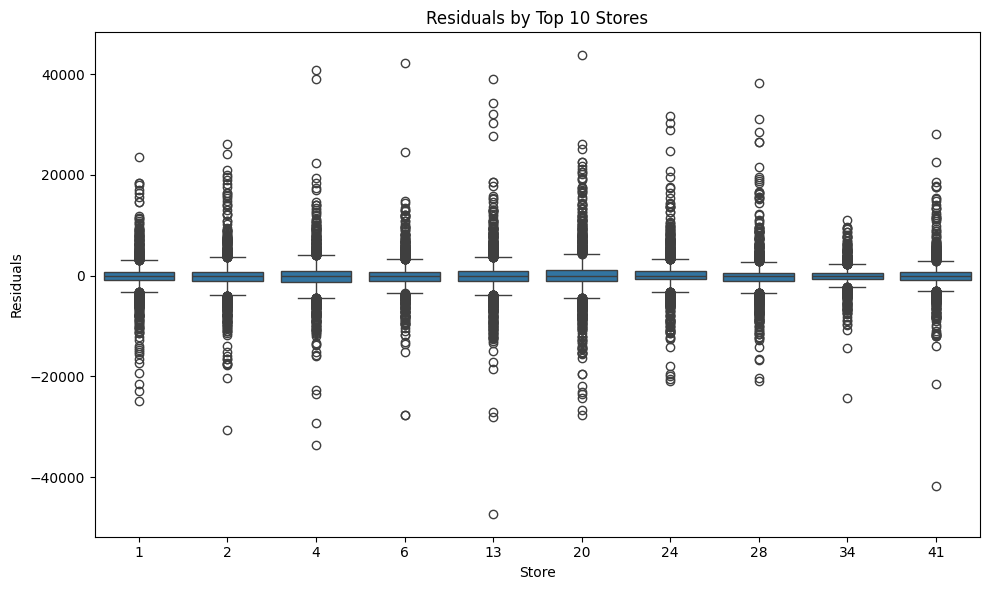

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Residuals' column exists and has no NaNs
test_df = test_df[['Store', 'Residuals']].dropna()

# Only keep stores with at least 5 residual points to avoid issues
store_counts = test_df['Store'].value_counts()
top_stores = store_counts[store_counts >= 5].nlargest(10).index

# Filter test_df
filtered_store_df = test_df[test_df['Store'].isin(top_stores)]

# Confirm it's safe to plot
print("Filtered data shape:", filtered_store_df.shape)
print("Unique stores:", filtered_store_df['Store'].nunique())

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Residuals', data=filtered_store_df)
plt.title("Residuals by Top 10 Stores")
plt.tight_layout()
plt.show()

### Training on full dataset

In [57]:
series = train_df.groupby('Date')['Weekly_Sales'].sum()

In [60]:
import joblib
with np.errstate(over='ignore', under='ignore'): # Suppress potential runtime warnings for exp smoothing
    final_ets_model = ExponentialSmoothing(
        series,
        seasonal_periods=52, # 52 weeks in a year for weekly data
        trend='add',        # 'add' or 'mul' for trend component
        seasonal='add',     # 'add' or 'mul' for seasonal component
        initialization_method="estimated" # Let statsmodels estimate initial values
    ).fit()
joblib.dump(final_ets_model, 'final_ets_model.pkl')

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


['final_ets_model.pkl']

In [61]:
model1.fit(X, y)
model2.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [62]:
joblib.dump(model1, 'rf_model.pkl')
joblib.dump(model2, 'xgb_model.pkl')

['xgb_model.pkl']

In [63]:
test_merged_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,45,11,2012
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,46,11,2012
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,47,11,2012
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315,48,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221,26,6,2013
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221,27,7,2013
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221,28,7,2013
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221,29,7,2013


In [64]:
train_merged_df.to_csv("data/train_merged.csv", index=False)

In [65]:
X_train.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       ...
       'Store_Dept_Pair_9_9', 'Store_Dept_Pair_9_90', 'Store_Dept_Pair_9_91',
       'Store_Dept_Pair_9_92', 'Store_Dept_Pair_9_93', 'Store_Dept_Pair_9_94',
       'Store_Dept_Pair_9_95', 'Store_Dept_Pair_9_96', 'Store_Dept_Pair_9_97',
       'Store_Dept_Pair_9_98'],
      dtype='object', length=3358)

In [66]:
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [67]:
X_train.to_csv("data/xtrain.csv", index=False)